<a href="https://colab.research.google.com/github/sudhakarmlal/Project1/blob/master/EVAAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Assignement2 -EVA***

## **Not an ideal network**

####  Install Keras using pip install and import keras library required for Convolution and building Neural Network

In [0]:
# https://keras.io/
!pip install -q keras
import keras

#### Import other packages e.g 'numpy' and 'np_utils' for numeric operations,'Sequential' to build a sequential network,'Convolution2D' for  2D convolutions,'mnist'  for downloading mnist dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

#### Split Mnist dataset into  test and train using mnist.load_data() function

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Visual first element of the train dataset using matplotlib library used for visualization

(60000, 28, 28)


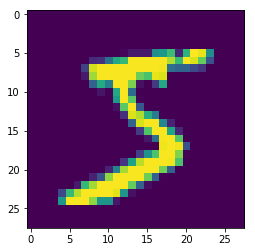

In [50]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

####  We need to unroll  the width and hieght of the  images to  28 * 28 frame  for both test and train dataset using reshape() function.This would be required since we would like to work on a  input vector 784(28*28) for our Network

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Plot the pixel value distribution for 1st Element of the train dataset

Text(0.5, 1.0, 'Pixel Value Distribution')

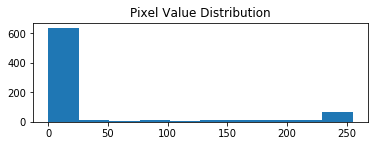

In [52]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

#### Looking at the graph above the pixel value distribution values ranges from 0 to 255 .The background majority close to 0(hence around 600 0's in the above plot) and the values which are close to  255 represents the actual digit

 ####  Reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### Normalizing the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we're using stochastic gradient descent to find the optimal weights for the network.As explained earlier the X_train value after normalizing would  be between  0 and 1

####  Check the values of y_train

In [54]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###   One Hot Encoding
#### Convert both training and testing labels into one-hot vectors.Use np_utils.to_categorical to convert 1-dimensional class to 10-dimensional classes

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Check the values of Y_train values after the One-Hot encoding

In [56]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Build the Network

#### From keras.layers import Activation and MaxPooling2D for building the network

In [0]:
from keras.layers import Activation, MaxPooling2D

#### Define sequential Model

In [0]:
model = Sequential()

### First Layer

#### Perform 3 * 3 convolution  on the input image of size 28 * 28 i.e perform convolution using  3*3 filter on 28*28 image

#### Take 32 3*3  filters  in the 1st layer 


#### The input channel dimension is: 28 *  28
#### The receptive field for the 1st Layer is :3


#### The no of input channels for the 1st Layer is :1



In [59]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


###Second Layer

####Perform 3 * 3 convolution on the  32 channels  using 3 * 3 filter.
####Take 64 3*3 filters


#### The input channel dimension is      : 26 *  26
####The receptive field for the 2nd Layer is     :5

####The  no of input channels for the 2nd Layer is :32

In [60]:
model.add(Convolution2D(64, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


###3rd  Layer

####Perform 3 * 3 convolution on the  64 channels  using 3 * 3 filter.
####Take 128 3*3 filters


#### The input channel dimension  for 3rd layer is : 24*24

####The receptive field for the 3rd  Layer is :7

####The no of input channels for the 3rd Layer is :64

In [61]:
model.add(Convolution2D(128, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


#### Perform max pooling which would reduce the size of the image from  22 * 22  to  11 * 11 

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

###4th  Layer

#### Perform 3 * 3 convolution on the 128 channels using 3 * 3 filter.

#### Take 256 3*3 filters

#### The input channel dimension for 4th layer is : 11*11

#### The receptive field for the 4th Layer is :9

#### The no of  input channels for the 4th  Layer is :128

In [63]:
model.add(Convolution2D(256, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


###5th  Layer

#### Perform 3 * 3 convolution on the 256 channels using 3 * 3 filter.

#### Take 512 3*3 filters

#### The input channel dimension for 5th layer is : 9*9

#### The receptive field for the 5th Layer is :11

#### The no of input channels for the 5th  Layer is :128

In [64]:
model.add(Convolution2D(512, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


###6th  Layer

#### Perform 3 * 3 convolution on the 512 channels using 3 * 3 filter.

#### Take 1024 3*3 filters

#### The input channel dimension for 6th layer is : 7 * 7

#### The receptive field for the 6th Layer is :13

#### The no of input channels for the 6th  Layer is :512

In [65]:
model.add(Convolution2D(1024, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


###7th  Layer

#### Perform 3 * 3 convolution on the 1024 channels using 3 * 3 filter.

#### Take 2048 3*3 filters

#### The input channel dimension for 7th layer is : 5 * 5

#### The receptive field for the 7th Layer is :15

#### The no of input channels for the 7th  Layer is :1024

In [66]:
model.add(Convolution2D(2048, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


###8th  Layer

#### Perform 3 * 3 convolution on the 2048 channels using 3 * 3 filter.

#### Take 10 3*3 filters

#### The input channel dimension for 8th layer is : 3 * 3

#### The receptive field for the 8th Layer is :17

#### The no of input channels for the 8th  Layer is :2048

In [67]:
model.add(Convolution2D(10, 3, 3, activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


#### Flatten the 10 channels  which is the output of  8th Layer  for the actual output


In [0]:
model.add(Flatten())
model.add(Activation('softmax'))

####  Summarize  the model  using model.summary().
#### It shows each layer's details along with the number of parameters used

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

In [0]:
#from keras.layers import Activation, MaxPooling2D

#model = Sequential() 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(128, 3, 3, activation='relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(Convolution2D(1024, 3, 3, activation='relu'))
#model.add(Convolution2D(2048, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))

#model.add(Flatten())
#model.add(Activation('softmax'))

#model.summary()

#### Compile the model.Use categorical_crossentropy as the loss function and adam optimizer

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model for 10 epochs with a batch size of 32

In [72]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.3027 - acc: 0.0989
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

#### Calculate the score of the *model*

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Print the score of the Model

In [74]:
print(score)

[2.3025851249694824, 0.098]


#### Find the predicted values using model.predict() on the test dataset(X_test)

In [0]:
y_pred = model.predict(X_test)

#### Print  y_pred(One hot encoded) values and the actual y value for the 1st 10 records in the data set

In [76]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


## Whats Wrong with the Model?

#### 1.The Model has unnecessarily used more number of layers where the receptive field is beyond the size of the image.

#### 2.As explained above, it would have been good if the model would have four layers where the receptive field is 9 and input dimension of the image is 11.

#### 3.There is no point going for more number of layers where receptive field is beyond the size of the image.This would lead the network to look beyond the size of the image and hence we can never achieve optimal results.

#### 4.Also its a wastage of processing(cpu/gpu) having redundant layers e.g 5th,6th,7th layers for the case above.

#### 5. As the model has read the features, we can think of reducing the number of number of filters for the later layers e.g  4th,5th,6th......That didn't happen in the case above where the no of filters kept increasing from 32 to 64 to 128 to 256 to 512 .... upto  2048.

#### 6.More number of filters would mean more processing which may not be feasible with commodity hardware.In case we want more number of filters in the later layers we can run that only on high end configuration machine which would be expensive

